# <center> <h1>Assignment 7</h1> </center>
<center> <h1>EIN 4933/6935 Python for Data Science Summer 2020</h1> </center>

You will evaluate a number of models using a data set from this <a href="http://archive.ics.uci.edu/ml/datasets.php">web-site</a>.

The data set that you choose must satisfy the following conditions:<br/>
**Attribute Characteristics** (i.e. features data type): Categorical and Numerical (i.e. Integer and/or Real)<br/>
**Associated Tasks** (i.e. prediction problem): Classification or Regression<br/>
**Number of Attributes** (i.e. features): >=10<br/>
**Number of Instances** (# of rows): >= 1000<br/>
**Missing Values?:** Yes <br/>

For example, <a href="http://archive.ics.uci.edu/ml/datasets/Adult">Adults Data Set</a> satifies the given conditions. In most cases, the data values and the set of features/response variable names are stored in different data sources. For Adults Data Set, the data values and features/response variables are located in *adult.data* and *adult.names*, respectively. You can download each files by clicking Data Folder in the given <a href="http://archive.ics.uci.edu/ml/datasets/Adult">link</a>.

Use the data set that you choose to answer the questions below. You can create as many cells as you desire for all solutions.<br/>

## Questions:
1) Choose and download a data set from the <a href="http://archive.ics.uci.edu/ml/datasets.php">link</a>. Make sure the set satisfies the above given conditions. Please note you will have to download both **.data** and **.names** files given in Data Folder web-page.<br/> 
2) Change the data values file from .data to .csv extension. This will be the csv file that you will use. This includes both data values and features/response variable names (i.e. header). For example, you can open .names file with a text editor (manually) and copy the features/response names. Or you can choose to read those names with a code.   
3) Read the data into a dataframe from csv file that you prepare in Question 2.<br/>
4) Remove any irrelevant data columns from the dataframe. If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in .names info file.<br/>
5) Perform the following preprocessing (Feature Extraction) tasks:
a) Normalize the **numerical features** by using `MinMaxScaler` built-in function in scikit-learn package.
b) Use a One-Hot Encoder method to encode **categorical features**. You can use `get_dummies()` from Pandas Package or `DictVectorizer()` from Scikit-Learn Package or any other built-in function that you are familiar with.<br/>
6) Create two dataframes: response and features. Split these dataframes into train and test parts.<br/>
7) You will evaluate a number of models.<br/> 
a) Choose at least 3 different models from the following list:<br/>
Multiple Linear Regression, Decision Trees, Random Forest, Logistic Regression, Extreme Gradient Boosting, Categorical Gradient Boosting, Light Gradient Boosting Model, Support Vector Machines, Naïve Bayes, Nearest Neighbor or any other model that you are familiary with. Many of these models have built-in function available in scikit-learn package. We have covered many of them in the lectures. Make sure to use the correct model function (classifier or regressor) for your prediction problem.<br/>
In your model evaluation, make sure to follow the following steps:<br/>
b) Train the models using train part of the data.<br/>
c) Generate predictions over the test data.<br/>
d) Calculate the associated metrics (accuracy for classification problem and MAE, MSE and RMSE for regression problem) over test data by calling a built-in function from scikit learn package. <br/>
e) Report the estimated metrics in a table for each model. <br/>
8) Report the feature importance results of the best model.<br/> 
a) Create a dataframe that has two columns: one for the name of the feature and one for the associated score. Make sure to report overall feature importance of each feature. (i.e. not for each label). You can aggregate using mean of importance values reported for each label. <br/>
b) Report feature importance in a bar chart. <br/>
9) Drop at least 3 least importance features. Re-train your best model and evaluate your model by repeating the steps (b)-(e) in Question-7.<br/>
10) Perform hyperparameter tuning with grid search for your best model. For example, the following code allows you to tune the hyperparameters of a decision tree model. The function returns the tuned parameters. You can use the same function by adjusting it for your best model. The candiate hyperparameters to be tuned can be obtained by calling `help` funciton in Python. For this specific example, you can call `help(DecisionTreeClassifier)`.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def grid_search(X, y, kfolds):
    
    #create a dictionary of all values we want to test
    param_grid = {'criterion':['gini','entropy'], 'max_depth': np.arange(3, 15)}
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=kfolds)
    #fit model to data
    dtree_gscv.fit(X, y)
    return dtree_gscv.best_params_

grid_search(X = features_train, y = response_train, kfolds = 5)

NameError: name 'features_train' is not defined

# Solutions:

1) Choose and download a data set from the <a href="http://archive.ics.uci.edu/ml/datasets.php">link</a>. Make sure the set satisfies the above given conditions. Please note you will have to download both **.data** and **.names** files given in Data Folder web-page.<br/> 

I decided to choose Adults data set which is a classification problem. This data set satisfies all the given conditions.

2) Change the data values file from .data to .csv extension. This will be the csv file that you will use. This includes both data values and features/response variable names (i.e. header). For example, you can open .names file with a text editor (manually) and copy the features/response names. Or you can choose to read those names with a code. 

In [2]:
#no coding is necessary

3) Read the data into a dataframe from csv file that you prepare in Question 2.<br/>

In [3]:
# %cd "C:\\Users\\Sakib\\Desktop\\TA Summer 20\\assignments\\a7\\solution"

[WinError 3] The system cannot find the path specified: 'C:\\\\Users\\\\Sakib\\\\Desktop\\\\TA Summer 20\\\\assignments\\\\a7\\\\solution'
C:\Users\nvanb\Documents\NathanPC\USF\python4DS\Assignments


In [4]:
import pandas as pd
df = pd.read_csv("../data/adult.csv", na_values = ' ?') #there is question marks in the data set. We will treat them as nas.

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.shape

(32561, 15)

4) Remove any irrelevant data columns from the dataframe. If there are any missing values in the dataset, they should be replaced through a data imputation method. Any missing rows should be deleted from the dataset. Each column data type must be converted into an appropriate data type. The data types can be obtained either in .names info file.<br/>

In [6]:
#I don't see any irrelevant columns in the dataset.
#Let's check if there is any missing values in the dataset. 
#I am going to write a function that reports the columns that have missing values.
def check_missings(df):
    return df.apply(pd.isnull).sum().sort_values(ascending=False).loc[ lambda series: series>0 ]
check_missings(df)

Series([], dtype: int64)

In [7]:
#or simply.
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [8]:
#let's check native-country
df['native-country'].drop_duplicates()

0                     United-States
4                              Cuba
6                           Jamaica
11                            India
14                                ?
15                           Mexico
27                            South
35                      Puerto-Rico
52                         Honduras
98                          England
112                          Canada
122                         Germany
135                            Iran
152                     Philippines
201                           Italy
217                          Poland
228                        Columbia
255                        Cambodia
265                        Thailand
289                         Ecuador
304                            Laos
311                          Taiwan
338                           Haiti
359                        Portugal
427              Dominican-Republic
497                     El-Salvador
503                          France
771                       Gu

In [9]:
#native-country
#There are so many different native-country names. So, we cannot simply fill the missing values with the most common one.
#We will choose to remove those rows.
na_rows = df['native-country'].isna()
df.dropna(subset=['native-country'], inplace=True)
df.shape

(32561, 15)

In [10]:
#occupation
df['workclass'].drop_duplicates()

0              State-gov
1       Self-emp-not-inc
2                Private
22           Federal-gov
25             Local-gov
27                     ?
54          Self-emp-inc
1901         Without-pay
5361        Never-worked
Name: workclass, dtype: object

In [11]:
#There aren't so many different occupation. We will replace with the most common one.
most_one = df['occupation'].value_counts().idxmax() 
df['occupation'] = df['occupation'].fillna(most_one)

In [12]:
#workclass
#let's check workclass
df['workclass'].drop_duplicates()

0              State-gov
1       Self-emp-not-inc
2                Private
22           Federal-gov
25             Local-gov
27                     ?
54          Self-emp-inc
1901         Without-pay
5361        Never-worked
Name: workclass, dtype: object

In [13]:
#There aren't so many different workclass. We will replace with the most common one.
most_one = df['workclass'].value_counts().idxmax() 
df['workclass'] = df['workclass'].fillna(most_one)

In [14]:
#let's check if there any NANs.
check_missings(df)

Series([], dtype: int64)

In [15]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [16]:
df.info() #data types are fitting in the description in .names file.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


5) Perform the following preprocessing (Feature Extraction) tasks:<br/>
a) Normalize the **numerical features** by using `MinMaxScaler` built-in function in scikit-learn package.

In [17]:
features = df.drop(columns = ['salary'], axis=1)
response = df[['salary']]

In [18]:
# select columns with numerical data types
num_cols = features.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns
# select columns with categorical data types
cat_cols = features.select_dtypes(include=['object', 'bool', 'category']).columns

In [19]:
num_cols = num_cols.tolist()
num_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [20]:
cat_cols = cat_cols.tolist()
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [21]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_matrix = scaler.fit_transform(features[num_cols])
features[num_cols] = scaled_matrix
features.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


b) Use a One-Hot Encoder method to encode **categorical features**. You can use `get_dummies()` from Pandas Package or `DictVectorizer()` from Scikit-Learn Package or any other built-in function that you are familiar with.<br/>

In [22]:
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

features_encoded = pd.get_dummies(features, columns=cat_cols)

features_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# #Encoding categorical data values
# from sklearn.preprocessing import LabelEncoder

# # pd.DataFrame(data = LabelEncoder().fit_transform(response), columns='salary')
# response_encoded = response.apply(LabelEncoder().fit_transform)

In [25]:
# response_encoded.head()

6) Create two dataframes: response and features. Split these dataframes into train and test parts.<br/>

In [26]:
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features_encoded, response, test_size=0.20, random_state=0)
features_train, features_test, response_train, response_test = my_result_list

7) You will evaluate a number of models.<br/> 
a) Choose at least 3 different models from the following list:<br/>
Multiple Linear Regression, Decision Trees, Random Forest, Logistic Regression, Extreme Gradient Boosting, Categorical Gradient Boosting, Light Gradient Boosting Model, Support Vector Machines, Naïve Bayes, Nearest Neighbor or any other model that you are familiary with. Many of these models have built-in function available in scikit-learn package. We have covered many of them in the lectures. Make sure to use the correct model function (classifier or regressor) for your prediction problem.<br/>

In [27]:
#I will choose Decision Trees, Random Forest and  Categorical Gradient Boosting models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In your model evaluation, make sure to follow the following steps:<br/>
b) Train the models using train part of the data.<br/>
c) Generate predictions over the test data.<br/>
d) Calculate the associated metrics (accuracy for classification problem and MAE, MSE and RMSE for regression problem) over test data by calling a built-in function from scikit learn package. <br/>
e) Report the estimated metrics in a table for each model. <br/>

In [28]:
models_list = [RandomForestClassifier(), 
               DecisionTreeClassifier(),
               CatBoostClassifier(silent = True, random_seed=2405)] # we put model functions in a list

model_names = ['Random Forest', 
               'Decision Tree',
               'Categorical Gradient Boosting'] # model names in a list

accuracy_list = []
results_dict = {}

for model in range(len(models_list)):
    classifier = models_list[model]
    classifier.fit(features_train, response_train)
    response_pred = classifier.predict(features_test)
    result = accuracy_score(response_pred, response_test)
    accuracy_list.append(result)
    
result_dict = {'Model Name':model_names, 'Accuracy':accuracy_list}
results_df = pd.DataFrame(result_dict)
results_df


C:\Users\nvanb\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,Model Name,Accuracy
0,Random Forest,0.852602
1,Decision Tree,0.812068
2,Categorical Gradient Boosting,0.869031


8) Report the feature importance results of the best model.<br/> 
a) Create a dataframe that has two columns: one for the name of the feature and one for the associated score. Make sure to report overall feature importance of each feature. (i.e. not for each label). You can aggregate using mean of importance values reported for each label. <br/>
b) Report feature importance in a bar chart. <br/>

In [29]:
#Categorical Gradient Boosting model gives the best accuracy result.
#we need to re-fit to get the model.
classifier = CatBoostClassifier(silent = True, random_seed=2405)
classifier.fit(features_train, response_train)

In [30]:
feature_importance = classifier.feature_importances_
feature_nemas = names = classifier.feature_names_
df_feature_importance = pd.DataFrame(zip(names, feature_importance), columns=['Feature', 'Importance Score'])
df_feature_importance.head(10)

,Feature,Importance Score
0,age,12.106780
1,fnlwgt,4.360966
2,education-num,9.709634
3,capital-gain,17.922004
4,capital-loss,6.971433
5,hours-per-week,7.746086
6,workclass_?,0.112710
7,workclass_Federal-gov,0.400868
8,workclass_Local-gov,0.397101
9,workclass_Never-worked,0.000283


In [31]:
#Let's aggregate using mean of importance values reported for each label.
#str.find() function it returns the lowest index (0) of its occurrence. If string is not found, it will return -1.
my_frames = []
for feature_name in cat_cols:
    feature_index = df_feature_importance['Feature'].str.find(feature_name) 
    aggregated_score =  df_feature_importance[feature_index == 0].mean()[0]
    new_df = pd.DataFrame({'Feature':[feature_name], 'Importance Score': [aggregated_score]})
    my_frames.append(new_df)

df_feature_importance_categorical = pd.concat(my_frames)
df_feature_importance_categorical

,Feature,Importance Score
0,workclass,0.295283
0,education,0.674254
0,marital-status,2.690037
0,occupation,0.507914
0,relationship,0.984094
0,race,0.164620
0,sex,1.007150
0,native-country,0.037666


In [32]:
df_feature_importance_numerical = df_feature_importance.loc[df_feature_importance['Feature'].isin(num_cols)]
df_feature_importance_numerical

,Feature,Importance Score
0,age,12.106780
1,fnlwgt,4.360966
2,education-num,9.709634
3,capital-gain,17.922004
4,capital-loss,6.971433
5,hours-per-week,7.746086


In [33]:
df_feature_importance_summary = df_feature_importance_numerical.append(df_feature_importance_categorical)
df_feature_importance_summary

,Feature,Importance Score
0,age,12.106780
1,fnlwgt,4.360966
2,education-num,9.709634
3,capital-gain,17.922004
4,capital-loss,6.971433
5,hours-per-week,7.746086
0,workclass,0.295283
0,education,0.674254
0,marital-status,2.690037
0,occupation,0.507914


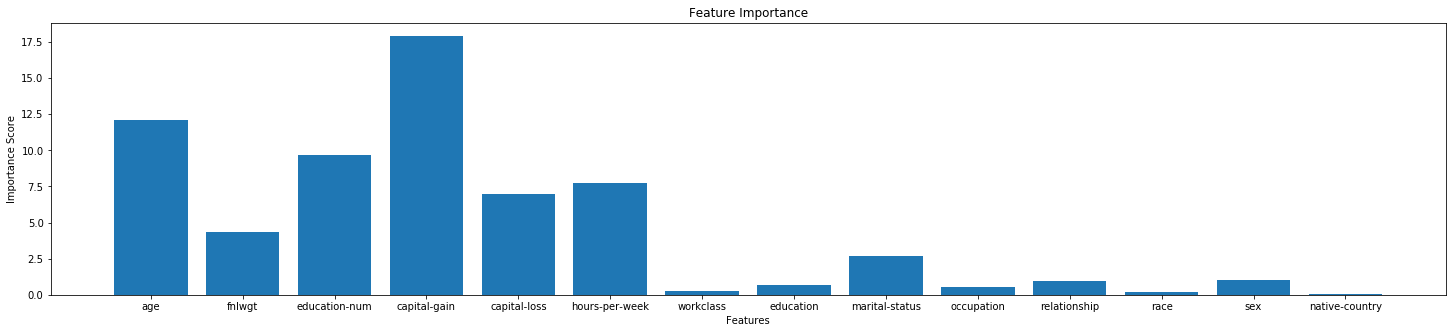

In [34]:
#now let's create the box plot
feature_names = df_feature_importance_summary.Feature.tolist()
importance = df_feature_importance_summary['Importance Score'].tolist()
from matplotlib import pyplot
pyplot.figure(figsize=(25, 5))
# plot feature importance
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Feature Importance')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

In [59]:
#pyplot.show()

9) Drop at least 3 least importance features. Re-train your best model and evaluate your model by repeating the steps (b)-(e) in Question-7.<br/>

In [39]:
# df_feature_importance_summary.sort_values(by=['Importance Score']).index
# feature_to_drop = df_feature_importance_summary[0:3]['Feature'].tolist()
# feature_to_drop
df_feature_importance_summary.nsmallest(3, 'Importance Score')

,Feature,Importance Score
0,native-country,0.037666
0,race,0.164620
0,workclass,0.295283


In [62]:
features_encoded_updated = features_encoded.drop(axis=1, columns=feature_to_drop)
features_encoded_updated.head()

,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.02174,0.0,0.397959,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.00000,0.0,0.122449,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.00000,0.0,0.397959,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.00000,0.0,0.397959,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.00000,0.0,0.397959,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
#Let's re-split the data
from sklearn.model_selection import train_test_split
my_result_list = train_test_split(features_encoded_updated, response, test_size=0.20, random_state=0)
features_train, features_test, response_train, response_test = my_result_list


models_list = [CatBoostClassifier(silent = True, random_seed=2405)] # we put model functions in a list

model_names = ['Categorical Gradient Boosting'] # model names in a list

accuracy_list = []
results_dict = {}

for model in range(len(models_list)):
    classifier = models_list[model]
    classifier.fit(features_train, response_train)
    response_pred = classifier.predict(features_test)
    result = accuracy_score(response_pred, response_test)
    accuracy_list.append(result)
    
result_dict = {'Model Name':model_names, 'Accuracy':accuracy_list}
results_df = pd.DataFrame(result_dict)
results_df

#dropping the least important features does not improve the accuracy result.

,Model Name,Accuracy
0,Categorical Gradient Boosting,0.868355


10) Perform hyperparameter tuning with grid search for your best model. For example, the following code allows you to tune the hyperparameters of a decision tree model. The function returns the tuned parameters. You can use the same function by adjusting it for your best model. The candiate hyperparameters to be tuned can be obtained by calling `help` funciton in Python. For this specific example, you can call `help(DecisionTreeClassifier)`.

In [ ]:
#Let's tune Categorical Gradient Boosting model. I will tune learning_rate, max_depth, num_trees
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

def grid_search(X, y, kfolds):
    
    #create a dictionary of all values we want to test
    param_grid = {'learning_rate':[0.01, 0.05, 0.1], #enumerate given values of learning from a new tree
                  'max_depth': np.arange(3, 8),#enumerate 3,4,5,...,8 tree depth
                  'num_trees':[1000, 4000]} #enumerate 1000 and 4000 trees
    # decision tree model
    cb_model=CatBoostClassifier(silent = True)
    #use gridsearch to test all values
    cb_gscv = GridSearchCV(cb_model, param_grid, cv=kfolds)
    #fit model to data
    cb_gscv.fit(X, y)
    return cb_gscv.best_params_

grid_search(X = features_train, y = response_train, kfolds = 5)